In [ ]:
from drn_interactions.config import Config, ExperimentInfo
from drn_interactions.io import load_derived_generic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from drn_interactions.plots import PAL_GREY_BLACK
from typing import Dict, Optional, Sequence, Tuple
from drn_interactions.plots.circular import circular_hist

sns.set_theme(context="paper", style="ticks")


In [ ]:
neurons = (
    load_derived_generic("neuron_types.csv")
    .assign(neuron_type=lambda x: pd.Categorical(
        x.neuron_type, categories=["SR", "SIR", "FF"], ordered=True))
)

df_responders_rate = (
    load_derived_generic("brain_states_spikerate_responders.csv")
    .merge(neurons)
    .assign(sig=lambda x: pd.Categorical(x["sig"], categories=[False, True], ordered=True))   
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


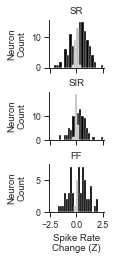

In [72]:
def responders_hist(
    df: pd.DataFrame, ax=None, value_col="Diff", sig_col="sig", despine=True, **kwargs
):
    if ax is None:
        _, ax = plt.subplots()
    kwargs = kwargs or {}
    kwargs["palette"] = kwargs.get("palette", PAL_GREY_BLACK[::-1])

    sns.histplot(data=df, x=value_col, hue=sig_col, ax=ax, **kwargs)
    if despine:
        sns.despine(ax=ax)
    return ax


def responders_hist_by_type(
    f,
    df,
    neuron_type_col: str = "neuron_type",
    gridspec_kwargs: Optional[Dict] = None,
    diff_col: str = "Diff",
    xticks: Sequence[np.number] = (-2.5, 0, 2.5),
    xlims: Tuple[np.number, np.number] = (-2.6, 2.6),
    remove_legend: bool = True,
    despine: bool = True,
    responders_hist_kwargs: Optional[Dict] = None,
):

    f = f or plt.figure(figsize=(2, 4))
    gridspec_kwargs = gridspec_kwargs or {}
    gridspec_kwargs["wspace"] = gridspec_kwargs.get("wspace", 0.5)
    gridspec_kwargs["top"] = gridspec_kwargs.get("hspace", 0.8)
    gridspec_kwargs["bottom"] = gridspec_kwargs.get("bottom", 0.2)
    neuron_types = df.neuron_type.value_counts().index.values
    responders_hist_kwargs = responders_hist_kwargs or {}
    responders_hist_kwargs["bins"] = responders_hist_kwargs.get("bins", 20)
    axes = f.subplots(
        len(neuron_types), 
        1, 
        gridspec_kw=gridspec_kwargs,
        # sharey=True,
        sharex=True
        )
    ax_dict = {neuron_type: ax for ax, neuron_type in zip(axes, neuron_types)}
    for i, (nt, ax) in enumerate(ax_dict.items()):
        df_sub = df.loc[lambda x: x[neuron_type_col] == nt]
        ax.set_title(nt)
        ax.set_xticks(xticks)
        ax.set_xlim(*xlims)
        responders_hist(
            df_sub,
            alpha=1,
            value_col=diff_col,
            ax=ax,
            despine=despine,
            **responders_hist_kwargs
        )
        ax.set_ylabel("Neuron\nCount")
        ax.set_xlabel("Spike Rate\nChange (Z)")
        ax.legend().remove()


f = plt.figure(figsize=(1.5, 3.5), constrained_layout=True)
responders_hist_by_type(f, df_responders_rate)
f.align_ylabels()
f.savefig(Config.fig_dir / "eeg" / "spikerate_change.png", dpi=300)


c:\users\roryl\repos\drn interactions\drn_interactions\plots\circular.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\roryl\repos\drn interactions\drn_interactions\plots\circular.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels

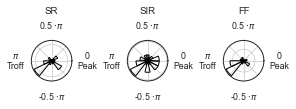

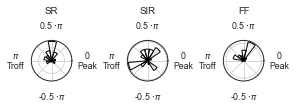

In [69]:
# Phase locking

def circular_hist_by_type(
    f, 
    df, 
    phase_col, 
    neuron_type_col: str = "neuron_type",
    gridspec_kwargs: Optional[Dict] = None,
    neuron_order: Optional[Sequence[str]] = None,
    circular_hist_kwargs: Optional[Dict] = None,
):
    f = f or plt.figure(figsize=(3, 1.2))
    gridspec_kwargs = gridspec_kwargs or {}
    gridspec_kwargs["wspace"] = gridspec_kwargs.get("wspace", 0.5)
    gridspec_kwargs["top"] = gridspec_kwargs.get("hspace", 0.8)
    gridspec_kwargs["bottom"] = gridspec_kwargs.get("bottom", 0.2)
    neuron_types = neuron_order or df.neuron_type.value_counts().index.values
    circular_hist_kwargs = circular_hist_kwargs or {}
    circular_hist_kwargs["bins"] = circular_hist_kwargs.get("bins", 14)
    axes = f.subplots(1, len(neuron_types), subplot_kw=dict(projection="polar"), gridspec_kw=gridspec_kwargs, sharex=True)
    ax_dict = {neuron_type: ax for ax, neuron_type in zip(axes, neuron_types)}
    for i, (nt, ax) in enumerate(ax_dict.items()):
        df_sub = df.loc[lambda x: x[neuron_type_col] == nt]
        ax.set_title(nt)
        circular_hist(
            df_sub[phase_col],
            ax=ax,
            **circular_hist_kwargs
        )
        ax.set_ylabel("")
        ax.set_xlabel("")

        ax.legend().remove()
        ax.set_yticklabels([])
    return ax_dict


df_phase_lock = (
    load_derived_generic("brain_states_phase_responders.csv")
    .drop(["neuron_type", "session_name"], axis=1)
    .merge(neurons)
)

f_delta = plt.figure(figsize=(4, 1.5), constrained_layout=True)
ax_dict = circular_hist_by_type(
    f=f_delta, 
    gridspec_kwargs=dict(wspace=0, top=0.9, bottom=0.1),
    df=df_phase_lock.query("oscillation == 'delta' and p < 0.05"), 
    phase_col="mean_angle",
    circular_hist_kwargs=dict(density=False),
    )
f_delta.savefig(Config.fig_dir / "eeg" / "phaselock_delta_hists.png", dpi=300)


f_theta = plt.figure(figsize=(4, 1.5), constrained_layout=True)
ax_dict = circular_hist_by_type(
    f=f_theta, 
    gridspec_kwargs=dict(wspace=0, top=0.9, bottom=0.1),
    df=df_phase_lock.query("oscillation == 'theta' and p < 0.05"), 
    phase_col="mean_angle",
    circular_hist_kwargs=dict(density=False),
    neuron_order=("SR", "SIR", "FF"),
    )

f_theta.savefig(Config.fig_dir / "eeg" / "phaselock_theta_hists.png", dpi=300)


In [ ]:
f, ax = plt.subplots(
    2, 1, 
    figsize=(1.5, 2.4), 
    sharex=True, 
    sharey=True,
    gridspec_kw=dict(hspace=0.2),
    constrained_layout=True,
    )


(
    df_phase_lock
    .assign(sig=lambda x: x.p < 0.05)
    .query("oscillation == 'delta'")
    .groupby(["neuron_type"], as_index=False)["sig"]
    .apply(lambda x: x.mean() * 100)
    .pipe(lambda x: (sns.barplot(
        data=x, 
        x="neuron_type", 
        y="sig", 
        color="black", 
        ax=ax[0]
        )))
)
sns.despine(ax=ax[0])
ax[0].set_ylabel("% Total\nNeurons")
ax[0].set_xlabel("")
ax[0].set_title("Inactivated\nBrain State")
ax[0].set_ylim(0, 100)

(
    df_phase_lock
    .assign(sig=lambda x: x.p < 0.05)
    .query("oscillation == 'theta'")
    .groupby(["neuron_type"], as_index=False)["sig"]
    .apply(lambda x: x.mean() * 100)
    .pipe(lambda x: (sns.barplot(
        data=x, 
        x="neuron_type", 
        y="sig", 
        color="black", 
        ax=ax[1]
        )))
)
sns.despine(ax=ax[1])
ax[1].set_ylabel("% Total\nNeurons")
ax[1].set_xlabel("")
ax[1].set_title("Activated\nBrain State")
ax[0].set_ylim(0, 100)

f.align_ylabels()
f.savefig(Config.fig_dir / "eeg" / "phase_lock_pct.png", dpi=300)